In [3]:
from tqdm import trange, tqdm
import numpy as np
import matplotlib.pyplot as plt
from ml_logger import logger
from plan2vec_experiments import RUN
import torch

# Neighbor Stats

In [4]:
# load_pairwise_ds = "episodeyang/plan2vec/2019/04-30/goal-mass-image/pairwise_map_reduce/16.16/54.604432"
load_pairwise_ds = "episodeyang/plan2vec/2019/05-02/goal-mass-image/pairwise_map_reduce/18.14/30.176637"
logger.configure(RUN.server, load_pairwise_ds)

creating new logging client... ✓ done
══════════════════════════════════════════
        run         
────────────────────┬─────────────────────
     dashboard      │ http://localhost:3001/episodeyang/plan2vec/2019/05-02/goal-mass-image/pairwise_map_reduce/18.14/30.176637
     createTime     │ 2019-05-02 22:05:58.869650
       prefix       │ episodeyang/plan2vec/2019/05-02/goal-mass-image/pairwise_map_reduce/18.14/30.176637
════════════════════╧═════════════════════


In [5]:
chunks = sorted(logger.glob("data/chunk*.pkl"))
print(chunks)
ds = np.concatenate([logger.load_pkl(p)[0] for p in tqdm(chunks, desc="load pairwise matrix")])

load pairwise matrix: 100%|██████████| 10/10 [00:18<00:00,  1.39s/it]


['data/chunk_00_10.pkl', 'data/chunk_01_10.pkl', 'data/chunk_02_10.pkl', 'data/chunk_03_10.pkl', 'data/chunk_04_10.pkl', 'data/chunk_05_10.pkl', 'data/chunk_06_10.pkl', 'data/chunk_07_10.pkl', 'data/chunk_08_10.pkl', 'data/chunk_09_10.pkl']


In [6]:
path, = sorted(logger.glob("data/all_states.pkl"))
all_states, = logger.load_pkl(path)
print(path, all_states.shape)

data/all_states.pkl (1000, 2)


In [7]:
__dir__ = "/Users/geyang/fair/cpc-belief/plan2vec_experiments/goal-mass-image"

In [8]:
def visualize_top(k=40):
    inds = ds.argsort()
    top_row_inds = inds[:, :k]
    top_ds = np.stack([d[_] for d, _ in zip(ds, top_row_inds)])

    fig = plt.figure(figsize=(4, 2.8))
    plt.title('Distribution')
    plt.hist(ds.flatten(), bins=100, histtype="step", color="#23aaff", density=True, linewidth=4, alpha=0.7, label="all")
    plt.hist(top_ds.flatten(), bins=100, histtype="step", color="red", label=f"top-{k}", density=True, linewidth=4, alpha=0.7)
    plt.legend(loc=(1.1, .8), frameon=False)
    # logger.savefig(f"figures/neighbor_score_distribution_{k}.png", dpi=300, bbox_inches='tight')
    plt.savefig(__dir__ + "/" + f"figures/neighbor_score_distribution_{k}.png", dpi=300, bbox_inches='tight')
    # plt.close()

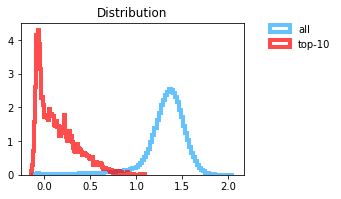

In [9]:
visualize_top(10)

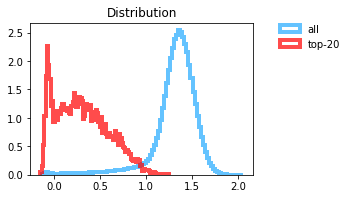

In [10]:
visualize_top(20)

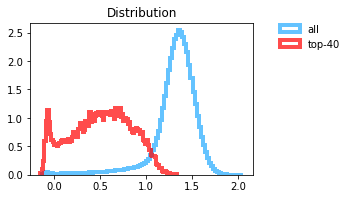

In [11]:
visualize_top(40)

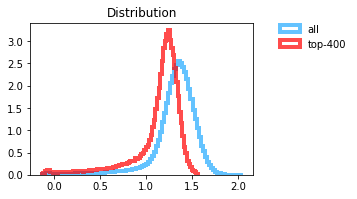

In [12]:
visualize_top(400)

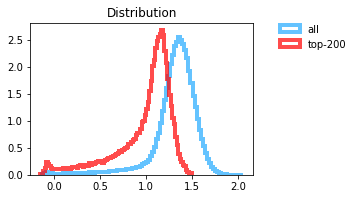

In [13]:
visualize_top(200)

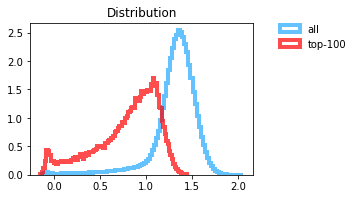

In [14]:
visualize_top(100)

GT distance vs score

In [15]:
gt_ds = np.linalg.norm(all_states[None, :, :] - all_states[:, None, :], ord=2, axis=-1)

(-0.5, 2)

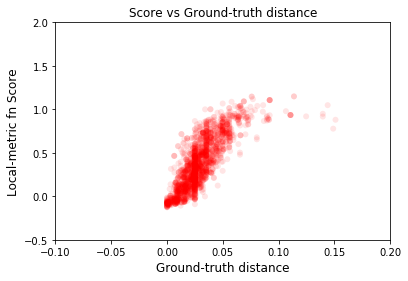

In [24]:
top_k = 20
ds[np.eye(ds.shape[0], dtype=bool)] = float('inf')
with torch.no_grad():
    _ = torch.topk(torch.tensor(ds, dtype=torch.float32), k=top_k, dim=1, largest=False, sorted=True)
    top_ds = _[0].cpu().numpy()
    top_inds = _[1].cpu().numpy()
    
plt.figure(figsize=(6, 4))
plt.title('Score vs Ground-truth distance')
for i in range(100):
    plt.scatter(gt_ds[i, top_inds[i]], ds[i, top_inds[i]], alpha=0.1, color="red", edgecolor="none")
plt.xlabel('Ground-truth distance', fontsize=12)
plt.ylabel('Local-metric fn Score', fontsize=12)
plt.xlim(-0.1, 0.2)
plt.ylim(-0.5, 2)

The correspondence is

| distance | score |
| :------: | :--: |
|   0.05   | 0.75 |

A good threshold would be around 

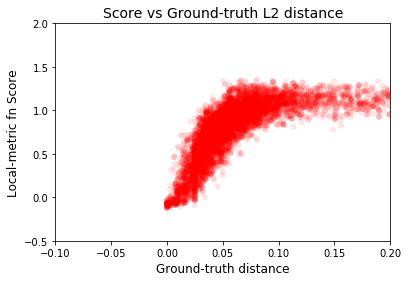

In [22]:
top_k = 100
ds[np.eye(ds.shape[0], dtype=bool)] = float('inf')
with torch.no_grad():
    _ = torch.topk(torch.tensor(ds, dtype=torch.float32), k=top_k, dim=1, largest=False, sorted=True)
    top_ds = _[0].cpu().numpy()
    top_inds = _[1].cpu().numpy()
    
plt.figure(figsize=(6, 4))
plt.title('Score vs Ground-truth L2 distance', fontsize=14)
for i in range(100):
    plt.scatter(gt_ds[i, top_inds[i]], ds[i, top_inds[i]], alpha=0.1, color="red", edgecolor="none")
plt.xlabel('Ground-truth distance', fontsize=12)
plt.ylabel('Local-metric fn Score', fontsize=12)
plt.xlim(-0.1, 0.2)
plt.ylim(-0.5, 2)
plt.savefig(__dir__ + "/" + f"figures/score_vs_gt_k-{top_k:d}.png", dpi=300, bbox_inches='tight')

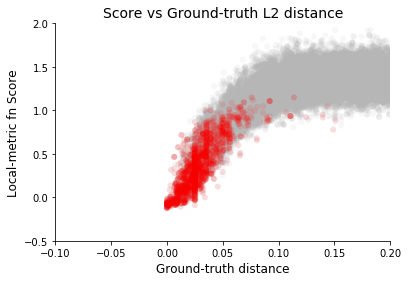

In [23]:
gt_ds_l1 = np.linalg.norm(all_states[None, :, :] - all_states[:, None, :], ord=2, axis=-1)

top_k = 1000
ds[np.eye(ds.shape[0], dtype=bool)] = float('inf')
with torch.no_grad():
    _ = torch.topk(torch.tensor(ds, dtype=torch.float32), k=top_k, dim=1, largest=False, sorted=True)
    top_ds = _[0].cpu().numpy()
    top_inds = _[1].cpu().numpy()
    
plt.figure(figsize=(6, 4))
plt.title('Score vs Ground-truth L2 distance', fontsize=14)
for i in range(100):
    plt.scatter(gt_ds_l1[i, top_inds[i]], ds[i, top_inds[i]], alpha=0.1, color="#b6b6b6", edgecolor="none")

top_k = 20
ds[np.eye(ds.shape[0], dtype=bool)] = float('inf')
with torch.no_grad():
    _ = torch.topk(torch.tensor(ds, dtype=torch.float32), k=top_k, dim=1, largest=False, sorted=True)
    top_ds = _[0].cpu().numpy()
    top_inds = _[1].cpu().numpy()
    
for i in range(100):
    plt.scatter(gt_ds_l1[i, top_inds[i]], ds[i, top_inds[i]], alpha=0.1, color="#ff0000", edgecolor="none")
plt.xlim(-0.1, 0.2)
plt.ylim(-0.5, 2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Ground-truth distance', fontsize=12)
plt.ylabel('Local-metric fn Score', fontsize=12)
plt.savefig(__dir__ + "/" + f"figures/score_vs_gt_k-{top_k:d}-all.png", dpi=300, bbox_inches='tight')